# Learn how regularization techniques can improve model generalization.




Epoch 1/10


1875/1875 [==============================] - 16s 7ms/step - loss: 0.7458 - accuracy: 0.7547 - val_loss: 0.5258 - val_accuracy: 0.8300
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5778 - accuracy: 0.8152 - val_loss: 0.4966 - val_accuracy: 0.8364
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5514 - accuracy: 0.8267 - val_loss: 0.4737 - val_accuracy: 0.8486
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5363 - accuracy: 0.8322 - val_loss: 0.4731 - val_accuracy: 0.8506
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5229 - accuracy: 0.8365 - val_loss: 0.4746 - val_accuracy: 0.8469
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5156 - accuracy: 0.8417 - val_loss: 0.4576 - val_accuracy: 0.8615
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5172 - accuracy: 0.8414 - val_loss: 0.4736 - val_acc

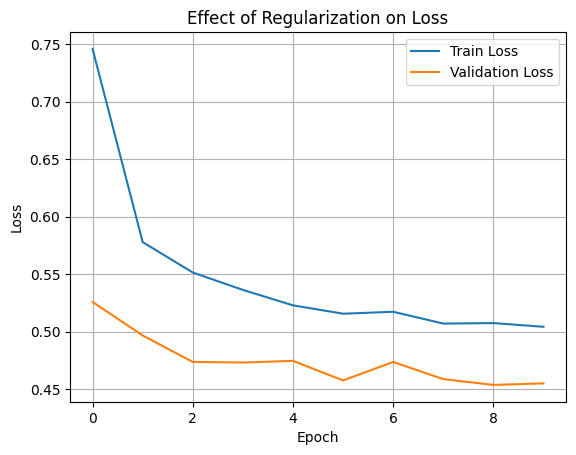

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load Fashion MNIST from TensorFlow datasets (from the internet)
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values (scale between 0 and 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define model with dropout and L2 regularization
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(1e-4)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(1e-4)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_data=(test_images, test_labels))

# Visualize loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Effect of Regularization on Loss")
plt.grid(True)
plt.show()
